In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import datetime

In [3]:
#Loop over each month of data and append
#Data source: free daily options chains downloaded from here:
#https://www.optionsdx.com/product/tsla-option-chains/

df_year = pd.DataFrame()

for month in range(1,13):
    if month <10:
        month_str = f"0{month}"
    else:
        month_str = f"{month}"
        
    fname = f"data/tsla_eod_2021{month_str}.txt"
    print(fname)
    df_add = pd.read_csv(fname)
    df_year = pd.concat([df_year, df_add])

#Reformat tricky column names containisn sqaure brackets
df_year.columns = df_year.columns.str.strip(" ")
df_year.columns = df_year.columns.str.strip("[]")
df_year.head()


data/tsla_eod_202101.txt
data/tsla_eod_202102.txt
data/tsla_eod_202103.txt
data/tsla_eod_202104.txt
data/tsla_eod_202105.txt
data/tsla_eod_202106.txt
data/tsla_eod_202107.txt
data/tsla_eod_202108.txt
data/tsla_eod_202109.txt
data/tsla_eod_202110.txt
data/tsla_eod_202111.txt


/var/folders/3_/4hp02k9s28l0xngsnvfp3jl40000gn/T/ipykernel_65589/3548119782.py:15: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  df_add = pd.read_csv(fname)


data/tsla_eod_202112.txt


/var/folders/3_/4hp02k9s28l0xngsnvfp3jl40000gn/T/ipykernel_65589/3548119782.py:15: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  df_add = pd.read_csv(fname)


,QUOTE_UNIXTIME,QUOTE_READTIME,QUOTE_DATE,QUOTE_TIME_HOURS,UNDERLYING_LAST,EXPIRE_DATE,EXPIRE_UNIX,DTE,C_DELTA,C_GAMMA,...,P_DELTA,P_GAMMA,P_VEGA,P_THETA,P_RHO,P_IV,P_VOLUME,STRIKE_DISTANCE,STRIKE_DISTANCE_PCT,QUOTE_UNIXTIME
0,1.609794e+09,2021-01-04 16:00,2021-01-04,16.0,729.77,2021-01-08,1610139600,4.0,1.00000,0.00000,...,-0.00055,-0.00001,0.00116,-0.01651,0.00000,1.954410,450.000000,379.8,0.520,NaN
1,1.609794e+09,2021-01-04 16:00,2021-01-04,16.0,729.77,2021-01-08,1610139600,4.0,0.99955,0.00000,...,-0.00052,0.00005,0.00214,-0.01966,-0.00004,1.915350,69.000000,369.8,0.507,NaN
2,1.609794e+09,2021-01-04 16:00,2021-01-04,16.0,729.77,2021-01-08,1610139600,4.0,1.00000,0.00000,...,-0.00015,0.00006,0.00145,-0.01941,-0.00015,1.844300,27.000000,359.8,0.493,NaN
3,1.609794e+09,2021-01-04 16:00,2021-01-04,16.0,729.77,2021-01-08,1610139600,4.0,0.99686,0.00004,...,-0.00115,0.00003,0.00245,-0.02374,0.00000,1.802300,43.000000,349.8,0.479,NaN
4,1.609794e+09,2021-01-04 16:00,2021-01-04,16.0,729.77,2021-01-08,1610139600,4.0,1.00000,0.00000,...,-0.00106,0.00000,0.00249,-0.03007,0.00000,1.776700,34.000000,339.8,0.466,NaN


<AxesSubplot:xlabel='date'>

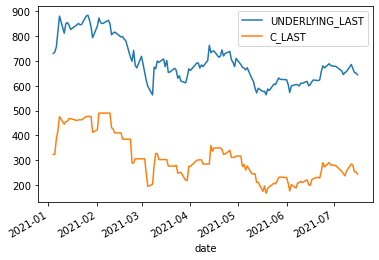

In [9]:
import datetime
df = df_year

df['date'] =  pd.to_datetime(df['QUOTE_DATE'])
df = df.set_index('date')
df = df.sort_index()
df = df[(df.STRIKE == 400)]
df = df[(df.STRIKE == 400) & (df.EXPIRE_UNIX == 1626465600)]

#https://www.optionsdx.com/option-chain-field-definitions/
df.plot(y=['UNDERLYING_LAST','C_LAST'], kind='line')

#df =df.loc['1990-7-1':'2021-07-01']
#df['C_IV'] = pd.to_numeric(df['C_IV'])


In [8]:
from math import log, sqrt, pi, exp
from scipy.stats import norm

df['rf'] = 0


def d1(S,K,T,r,sigma):
    return(log(S/K)+(r+sigma**2/2.)*T)/(sigma*sqrt(T))

def d2(S,K,T,r,sigma):
    return d1(S,K,T,r,sigma)-sigma*sqrt(T)

def bs_call(S,K,T,r,sigma):
    return S*norm.cdf(d1(S,K,T,r,sigma))-K*exp(-r*T)*norm.cdf(d2(S,K,T,r,sigma))
  
def bs_put(S,K,T,r,sigma):
    return K*exp(-r*T)-S*bs_call(S,K,T,r,sigma)

sigma = .01

df['d1'] = df.apply(lambda x: d1(x.UNDERLYING_LAST,x.STRIKE,x.DTE,x.rf,sigma), axis=1)
print(df.d1)
df['C_price_WCB'] = df.apply(lambda x: bs_call(x.UNDERLYING_LAST,x.STRIKE,x.DTE,x.rf,sigma), axis=1)

df.plot(y=['C_price_WCB','C_LAST'], kind='line')

TypeError: unsupported operand type(s) for ** or pow(): 'str' and 'int'

In [94]:
from datetime import datetime, date
import numpy as np
import pandas as pd
import pandas as pd
from pandas import DataFrame
import pandas_datareader.data as web

stock = 'SPY'
expiry = '12-18-2022'
strike_price = 370

today = datetime.now()
one_year_ago = today.replace(year=today.year-1)

df = web.DataReader(stock, 'yahoo', one_year_ago, today)

df = df.sort_values(by="Date")
df = df.dropna()
df = df.assign(close_day_before=df.Close.shift(1))
df['returns'] = ((df.Close - df.close_day_before)/df.close_day_before)

sigma = np.sqrt(252) * df['returns'].std()
uty = (web.DataReader(
    "^TNX", 'yahoo', today.replace(day=today.day-1), today)['Close'].iloc[-1])/100
lcp = df['Close'].iloc[-1]
t = (datetime.strptime(expiry, "%m-%d-%Y") - datetime.utcnow()).days / 365

print('The Option Price is: ', bs_call(lcp, strike_price, t, uty, sigma))

TypeError: string indices must be integers

297.0310914358504


<AxesSubplot:xlabel='date'>

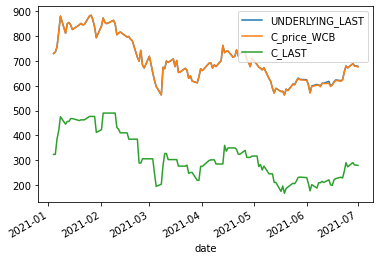

In [72]:
from scipy.stats import norm
import matplotlib.pyplot as plt

#SOURCE FOR PRICING CODE 
#https://www.quantstart.com/articles/European-Vanilla-Call-Put-Option-Pricing-with-Python/

def d_j(j, S, K, r, v, T):
    # S = Underlying
    # K = Strike
    # r = Risk_free rate
    # T is time to maturity
    # v = volatility of underlying 
    # 
    """
    d_j = \frac{log(\frac{S}{K})+(r+(-1)^{j-1} \frac{1}{2}v^2)T}{v sqrt(T)}
    """
    #print(j)
    #print(K)
    #print(r)
    #print(T)
    
    return (np.log(S/K) + (r + ((-1)**(j-1))*0.5*v*v)*T)/(v*(T**0.5))

def vanilla_call_price(S, K, r, v, T):
    """
    Price of a European call option struck at K, with
    spot S, constant rate r, constant vol v (over the
    life of the option) and time to maturity T
    """
    price = S * norm.cdf(d_j(1, S, K, r, v, T)) - K*np.exp(-r*T) * norm.cdf(d_j(2, S, K, r, v, T))
    return price 
        
df['rf'] = 0.05
df['C_IV'] = pd.to_numeric(df['C_IV'])


print(vanilla_call_price(300,20,.05,20,.04))

df['C_price_WCB'] = df.apply(lambda x: vanilla_call_price(x.UNDERLYING_LAST,x.STRIKE,x.rf,x.C_IV,x.DTE), axis=1)

df.plot(y=['UNDERLYING_LAST','C_price_WCB','C_LAST'], kind='line')
